# Customer Segmentation Analysis Part 1

## Q1. What is Customer Segmentation and why is it important from marketing perspective?

## A1. Customer segmentation is the practise of dividing your consumers into groups based on similar criteria such as demographics or habits in order to better advertise to them. These consumer segmentation groups may also be used to kick off conversations about creating marketing personas.

## Import Libraries and Data

In [1]:
# Import the appropriate Libraries

import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
import chardet
import warnings
warnings.filterwarnings("ignore")

In [2]:
# with open('Sales_data.csv', 'rb') as file: print(chardet.detect(file.read()))

In [3]:
# Load the dataset

data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')

# encoding='latin-1'

## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.shape

(541909, 8)

In [6]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

## Data Preprocessing

- Remove Null Values
- Remove Duplicate Values

In [7]:
# Take all the rows where customer ID not equal to blank

data = data[pd.notnull(data['CustomerID'])]

In [8]:
data.shape

(406829, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
# Removing duplicates

filtered_data = data[['Country','CustomerID']].drop_duplicates()

In [12]:
filtered_data.shape

(4380, 2)

In [13]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [14]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights

- Top 10 country customer data

In [15]:
# Check the country wise distribution

data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [16]:
filtered_data.Country.value_counts()[:10]

United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

<AxesSubplot:>

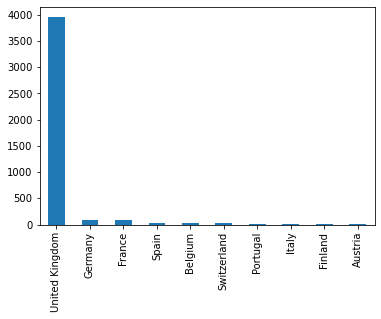

In [17]:
# Plot the data

filtered_data.Country.value_counts()[:10].plot(kind='bar')

## Q2. What do you observe?

## A2. From the above plot we observe that United Kingdom is the country with maximum customers.

In [18]:
# Filter data by the top most country

uk_data = data[data.Country=='United Kingdom']

In [19]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


## Q3. What do you observe? Which column needs special attention?

## A3. We see from the above output that the quantity column has negative values whereas unit price column has minimum value of '0', thus they need immediate attention.

In [20]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [21]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [22]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [23]:
# Filter the required columns only

uk_data = uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [24]:
# Calculate Total Price

uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

# Time frame of data

In [25]:
# Check Min and Max dates

print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


## Q4. Comment on the above results

## A4. Based on above results, we understand that since the invoiceDate is in object datatype instead of DateTime and have data from 2010, it displayes with minimum from Jan 10th 2011 to maximum at Sept 9th 2011.

## Perform RFM Analysis

- For Recency, Calculate the number of days between present date and date of last purchase for each customer.
- For Frequency, Calculate the number of orders for each customer.
- For Monetary, Calculate sum of purchase price for each customer

In [26]:
# Store a date as a reference point for recency calculations

PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format

uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [27]:
# Check Min and Max dates

print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [28]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [29]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

## Q5. Comment on the above results

## A5. The error in maximum and minimum InvoiceDate have been corrected and we have number of entries for each Invoice Number.

In [30]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [31]:
rfm = uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [32]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [33]:
# Rename the columns 

rfm.columns = ['monetary','frequency','recency']

In [34]:
rfm['recency'] = rfm['recency'].astype(int)

In [35]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [36]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


## Q6. What do you think is wrong with this table?

## A6. The column names are shuffled and they are named incorrectly.

In [37]:
# Change the column names

rfm.columns=['recency','frequency','monetary']

## Create Visuals

- Histogram for Recency Data
- Histogram for Frequency Data
- Histogram for Monetary Data

array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

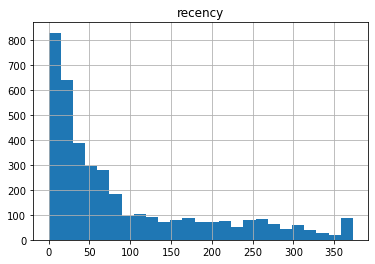

In [38]:
# Histogram for Recency Data (UK)

rfm.hist(column='recency', bins=25)

## Q7. What does the above chart tell?

## A7. The above plot suggests that from all the customers, only somewhat 50 customers have a recency of 400 and above.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

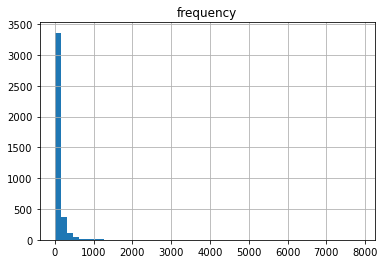

In [39]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency', bins=50)

## Q8. What does the above chart tell?

## A8. The above plot suggests that we have some customers with very high frequency over 3000 but majority of them are under 500.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

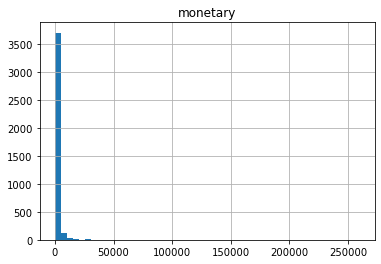

In [40]:
# Histogram for Monetary Data (UK)

rfm.hist(column='monetary', bins=50)

## Q9. What does the above chart tell?

## A9. From the above plot, we can interpret that we have certain customers with monetary ranging over 3500, but others are even below 500.

In [41]:
rfm.sort_values(by=['monetary'], inplace=True)

rfm = rfm[rfm.monetary < 10000]

rfm.tail(100)

,recency,frequency,monetary
CustomerID,,,
14049.0,16,488,5681
14110.0,3,156,5683
13468.0,1,302,5704
16553.0,163,84,5719
13178.0,26,265,5725
...,...,...,...
14733.0,16,202,9585
13458.0,7,382,9646
15078.0,7,440,9743


array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

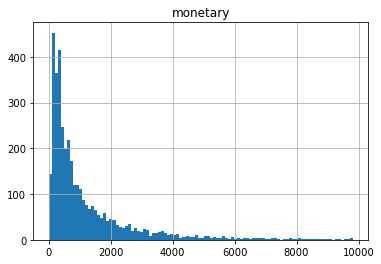

In [42]:
# Histogram for Monetary Data (UK)

rfm.hist(column='monetary', bins=100)

## Q10. What does the above chart tell?

## A10.

In [43]:
# Calculate Z scores to normalize the data

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             recency  frequency  monetary
CustomerID                               
13256.0     0.795485   0.667799  0.803362
16738.0     2.041592   0.667799  0.801337
16454.0     0.494735   0.659217  0.799312
14792.0     0.304260   0.659217  0.799312
17956.0     1.560391   0.667799  0.795262
...              ...        ...       ...
14733.0     0.775435   1.057341  5.666188
13458.0     0.865660   2.602242  5.707361
15078.0     0.865660   3.100044  5.772833
13199.0     0.905760   0.344969  5.822780
13001.0     0.895735   2.233182  5.823455

[3836 rows x 3 columns]


In [44]:
# Save the cleaned file

rfm.to_csv('rfm.csv')

## Calcualte the RFM Score

In [45]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 

quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 15.0, 0.4: 33.0, 0.6: 72.0, 0.8: 182.0},
 'frequency': {0.2: 13.0, 0.4: 28.0, 0.6: 55.0, 0.8: 115.0},
 'monetary': {0.2: 236.0, 0.4: 450.0, 0.6: 854.0, 0.8: 1822.0}}

In [46]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [47]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [48]:
# Combine the scores

rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
13256.0,14,1,0,5,1,1,511
16738.0,297,1,3,1,1,1,111
16454.0,44,2,6,3,1,1,311
14792.0,63,2,6,3,1,1,311
17956.0,249,1,12,1,1,1,111


In [49]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t lose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
  
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,5,1,1,511,new customers
16738.0,297,1,3,1,1,1,111,at risk
16454.0,44,2,6,3,1,1,311,needs attention
14792.0,63,2,6,3,1,1,311,needs attention
17956.0,249,1,12,1,1,1,111,at risk


In [50]:
# Count the number of customers in each segment

segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't lose           77
new customers       147
needs attention     477
loyal customers     695
champions           989
at risk            1451
Name: Segment, dtype: int64

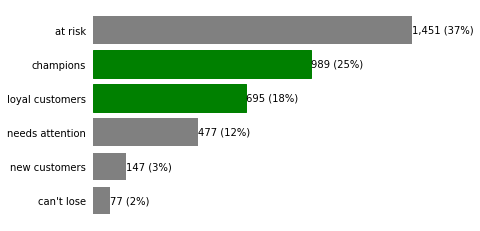

In [51]:
# Distribution of Segments

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

## Q11. Comment on the above chart

## A11. Based on RFM score we can see that from the total customers we have 45% customers that are loyal, champions and the ones' we can't lose, whereas 37% are the ones at the verge of moving away and 12% needs attention to add them to the 45% segment. 

## Q12. Who are the best customers?

## A12. The customers in the category of 'champions' with RFM score of 5 in each are the best customers.

In [52]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
16523.0,1,290,9418,5,5,5,555,champions


## Q13. Which customers are likely to churn?

## A13. The customers in the category of 'need attention' are the ones who are likely to churn.

In [53]:
# Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13093.0,275,159,7832,1,5,5,155,can't lose
17850.0,372,297,5391,1,5,5,155,can't lose
15032.0,256,52,4959,1,3,5,135,at risk
15808.0,306,208,3734,1,5,5,155,can't lose
17230.0,264,69,3638,1,4,5,145,at risk


## Q14. Which customers we are going to lose?

## A14. The customers in the category of 'at risk' are the ones who are likely to churn.

In [54]:
# Customers who's recency, frequency and monetary values are low 

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
14237.0,373,9,161,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk
15350.0,373,5,115,1,1,1,111,at risk
13747.0,373,1,79,1,1,1,111,at risk
15070.0,372,1,106,1,1,1,111,at risk


## Q15. Who are the loyal customers?

## A15. The customers in the segment of champions and loyal cutomers with RFM value of 4 or 5 in each are loyal customers.

In [55]:
# Customers with high frequency value

rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
14733.0,16,202,9585,4,5,5,455,loyal customers


## Calculate RFM scores using 4 quintiles instead of 5 and answer all the questions again

- Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6

In [56]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
rfm = pd.read_csv('rfm.csv')

quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .50, .75]).to_dict()
quintiles

{'recency': {0.25: 18.0, 0.5: 51.5, 0.75: 147.0},
 'frequency': {0.25: 16.0, 0.5: 40.0, 0.75: 95.0},
 'monetary': {0.25: 293.0, 0.5: 628.0, 0.75: 1476.0}}

In [57]:
# Define functions to assign ranks from 1 to 4. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 4
    elif x <= quintiles['recency'][.50]:
        return 3
    elif x <= quintiles['recency'][.75]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.25]:
        return 1
    elif x <= quintiles[c][.50]:
        return 2
    elif x <= quintiles[c][.75]:
        return 3
    else:
        return 4 

In [58]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [59]:
# Combine the scores

rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score
0,13256.0,14,1,0,4,1,1,411
1,16738.0,297,1,3,1,1,1,111
2,16454.0,44,2,6,3,1,1,311
3,14792.0,63,2,6,2,1,1,211
4,17956.0,249,1,12,1,1,1,111


In [60]:
# Create the customer segments based on your knowledge. 
# Create 5 segments based on R and F scores

segments = {
    '[1-2][1-2]': 'old but not frequent-risk',
    '[3-4][1-2]': 'new but not frequent-watch',
    '[1-2][3-4]': 'old and frequent-best',
    '[3-4][3-4]': 'new and frequent-potential'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,13256.0,14,1,0,4,1,1,411,new but not frequent-watch
1,16738.0,297,1,3,1,1,1,111,old but not frequent-risk
2,16454.0,44,2,6,3,1,1,311,new but not frequent-watch
3,14792.0,63,2,6,2,1,1,211,old but not frequent-risk
4,17956.0,249,1,12,1,1,1,111,old but not frequent-risk


In [61]:
# Count the number of customers in each segment

segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

old and frequent-best          600
new but not frequent-watch     627
new and frequent-potential    1291
old but not frequent-risk     1318
Name: Segment, dtype: int64

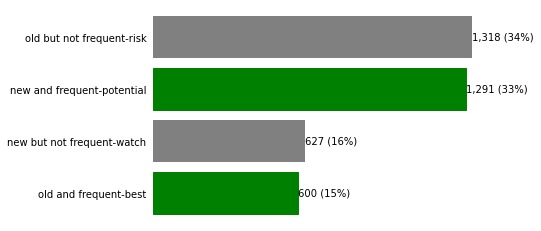

In [62]:
# Distribution of Segments

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['new and frequent-potential', 'old and frequent-best']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

## Q16. Comment on the above chart

## A16. Based on RFM score we can see that from the total customers we have 48% customers that are our best and most potential customers, whereas 34% are the ones at the verge of moving away and 16% needs attention to add them to the 45% segment. 

## Q17. Who are the best customers?

## A17.  The customers in the category of 'new and frequent-best' with RFM score of 4 in each are the best customers.

In [63]:
rfm[rfm['RFM Score']=='444'].sort_values('monetary', ascending=False).head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
3835,13001.0,4,339,9818,4,4,4,444,new and frequent-potential
3834,13199.0,3,119,9817,4,4,4,444,new and frequent-potential
3833,15078.0,7,440,9743,4,4,4,444,new and frequent-potential
3832,13458.0,7,382,9646,4,4,4,444,new and frequent-potential
3831,14733.0,16,202,9585,4,4,4,444,new and frequent-potential


## Q18. Which customers are likely to churn?

## A18. The customers in the category of 'new but not potential-watch' are the ones who are likely to churn.

In [64]:
# Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
3805,13093.0,275,159,7832,1,4,4,144,old and frequent-best
3799,12980.0,157,20,7374,1,2,4,124,old but not frequent-risk
3739,16553.0,163,84,5719,1,3,4,134,old and frequent-best
3717,17850.0,372,297,5391,1,4,4,144,old and frequent-best
3692,15032.0,256,52,4959,1,3,4,134,old and frequent-best


## Q19. Which customers are we going to lose?

## A19. The customers in the category of 'old but not potential-risk' are the ones who are going to lose.

In [65]:
# Customers who's recency, frequency and monetary values are low 

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
441,14237.0,373,9,161,1,1,1,111,old but not frequent-risk
639,13065.0,373,14,205,1,1,1,111,old but not frequent-risk
154,17643.0,373,8,101,1,1,1,111,old but not frequent-risk
841,16048.0,373,8,256,1,1,1,111,old but not frequent-risk
97,13747.0,373,1,79,1,1,1,111,old but not frequent-risk


## Q20.  Who are the loyal customers?

## A20. The customers in the category of 'new and frequent-best' are the ones who are our loyal customers.

In [66]:
# Customers with high frequency value

rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM Score,Segment
3835,13001.0,4,339,9818,4,4,4,444,new and frequent-potential
3834,13199.0,3,119,9817,4,4,4,444,new and frequent-potential
3833,15078.0,7,440,9743,4,4,4,444,new and frequent-potential
3832,13458.0,7,382,9646,4,4,4,444,new and frequent-potential
3831,14733.0,16,202,9585,4,4,4,444,new and frequent-potential


# Customer Segmentation Analysis Part 2

In [67]:
# Import the appropriate Libraries

import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [68]:
# Load rfm data from Part 1

rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [69]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


<AxesSubplot:>

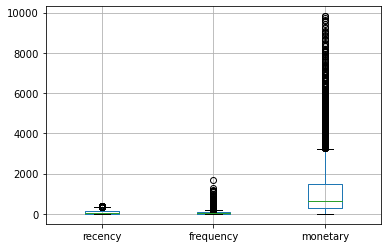

In [70]:
# Create box plots to check for outliers

rfm.boxplot()

In [71]:
# Calculate Z scores to normalize the data

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             recency  frequency  monetary
CustomerID                               
13256.0     0.795485   0.667799  0.803362
16738.0     2.041592   0.667799  0.801337
16454.0     0.494735   0.659217  0.799312
14792.0     0.304260   0.659217  0.799312
17956.0     1.560391   0.667799  0.795262
...              ...        ...       ...
14733.0     0.775435   1.057341  5.666188
13458.0     0.865660   2.602242  5.707361
15078.0     0.865660   3.100044  5.772833
13199.0     0.905760   0.344969  5.822780
13001.0     0.895735   2.233182  5.823455

[3836 rows x 3 columns]


In [72]:
rfm_clean = rfm[(z < 3).all(axis=1)]

## Q1. What is the purpose of the above code?

## A1. The above code is filtering out all the normalised values values of RFM which are under 3 for all the columns.

In [73]:
rfm.shape

(3836, 3)

In [74]:
rfm_clean.shape

(3683, 3)

## Q2. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

<AxesSubplot:>

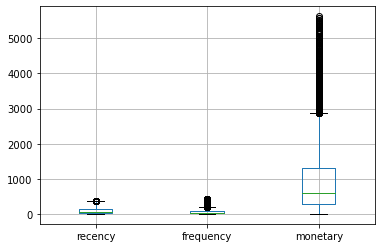

In [75]:
# Create box plots to check for outliers

rfm_clean.boxplot()

## A2. After cleaning the data we see that the upper limit reduced to half at 5000 which was earlier 10000 and we see that the distribution of monetary is much more elaborate and pertains to only a described limit. 

## Q3. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms

array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

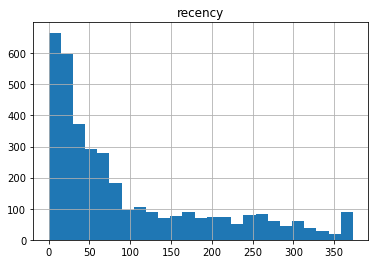

In [76]:
# Histogram for Cleaned Frequency Data (UK)

rfm_clean.hist(column='recency', bins=25)

## The above plot explains customers recency and depicts that we have around 100 customers which have a recency value over 100 rest everyone is below that range.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

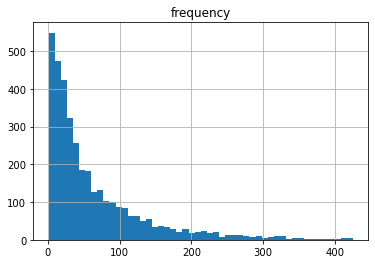

In [77]:
# Histogram for Cleaned Frequency Data (UK)

rfm_clean.hist(column='frequency', bins=50)

## The above plot explains that we have very few customers approximately 50 with high frequency over 200 whereas all the others are under 100.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

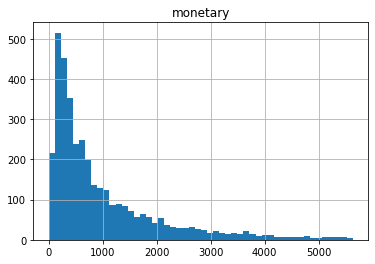

In [78]:
# Histogram for Cleaned Frequency Data (UK)

rfm_clean.hist(column='monetary', bins=50)

## The above plot describes the fact that around 1000 are the once comprising of high monetary values over 100 to over 500 whereas rest of them are all under 100. 

## Perform cluster analysis using K-means clustering with the original rfm dataframe

In [79]:
X = rfm

In [80]:
X.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


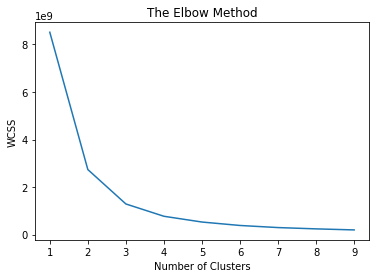

In [81]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)

from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [83]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [84]:
# Adding cluster ID to the dataframe

rfm['Cluster_ID'] = y_kmeans

In [85]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,14,1,0,0
16738.0,297,1,3,0
16454.0,44,2,6,0
14792.0,63,2,6,0
17956.0,249,1,12,0


## Plot the graphs

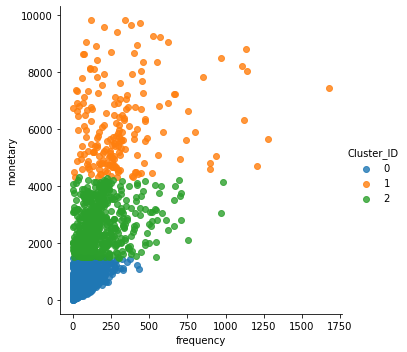

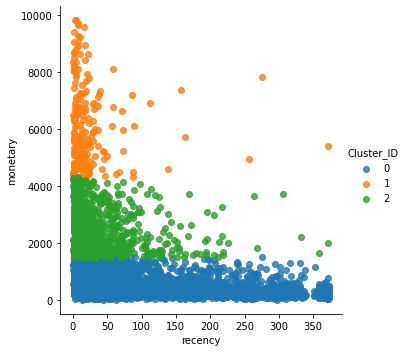

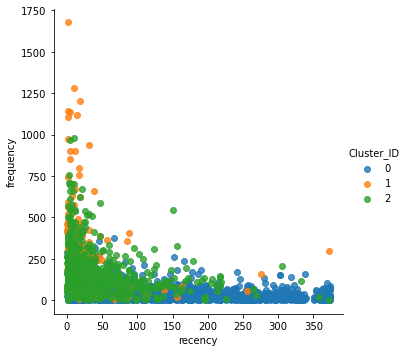

In [86]:
# Create a plot for frequency vs monetary 

facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs monetary

facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs frequency

facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

## Q4. Comment on the plots

## A4. From the above plots, we can see that the plots for monetary with frequency and recency have clear separation for all  clusters where as for frequeny and recency the clusters are somewhat overlapping. 

## Q5. Perform Cluster Analysis with k=4

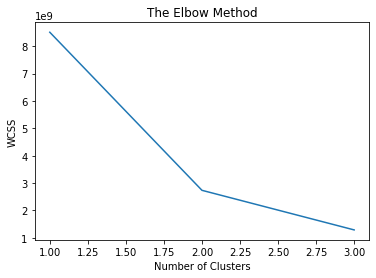

In [87]:
# 4 number of clusters

wcss = []
for i in range(1,4):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [88]:
rfm.describe()

,recency,frequency,monetary,Cluster_ID
count,3836.000000,3836.000000,3836.000000,3836.000000
mean,93.350104,78.806830,1190.225235,0.443691
std,99.763562,116.527464,1481.749156,0.800397
min,0.000000,1.000000,0.000000,0.000000
25%,18.000000,16.000000,293.000000,0.000000
50%,51.500000,40.000000,628.000000,0.000000
75%,147.000000,95.000000,1476.000000,0.000000
max,373.000000,1677.000000,9818.000000,2.000000


In [89]:
X1 = rfm_clean

## Q6. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

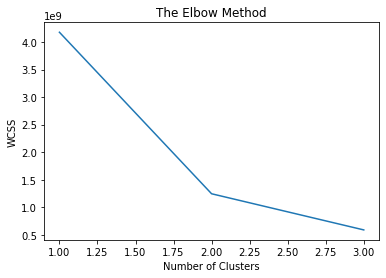

In [90]:
# 4 number of clusters

wcss = []
for i in range(1,4):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
# Fitting K Means to the Datatset using k = 2

kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(X1)

In [92]:
# Adding cluster ID to the dataframe

rfm_clean['Cluster_ID'] = y_kmeans

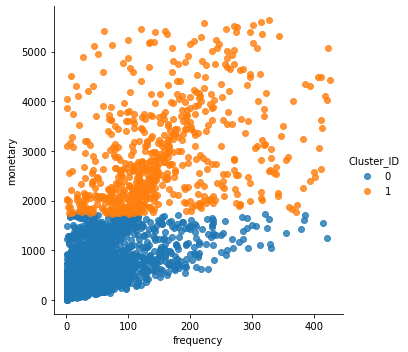

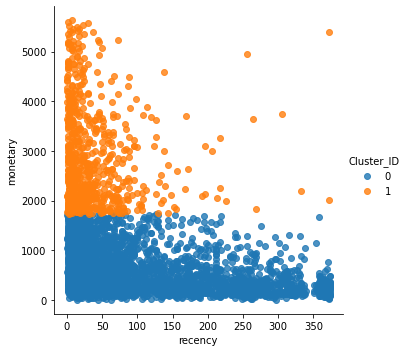

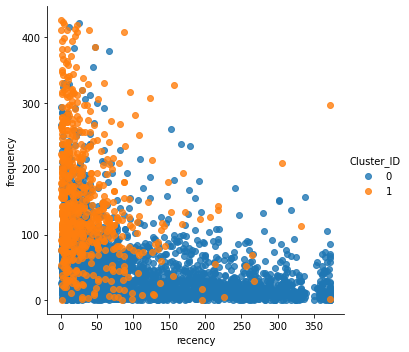

In [93]:
# Create a plot for frequency vs monetary 

facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs monetary

facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs frequency

facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

## From the above plots, we can see that the plots for monetary with frequency and recency have clear separation for all  clusters where as for frequeny and recency the clusters are somewhat overlapping. 

## Calculate mean for every cluster

In [94]:
for i in range(2): 
    rfm_clean_mean = rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,109.436610,44.656074,575.161205
1,36.984894,152.808157,2893.892749


## Perform cluster analysis using hierarchical clustering with the cleaned rfm dataframe

In [95]:
# Import the libraries

import scipy.cluster.hierarchy as sch

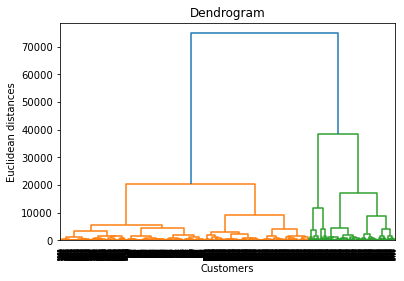

In [96]:
# Build a dendrogram using the minimum variance method

dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Identify the clusters based on dendrogram

In [97]:
# Train the hierarchical clustering model on the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)

In [98]:
X1['Cluster_ID'] = y_hc

In [99]:
X1.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,14,1,0,1
16738.0,297,1,3,1
16454.0,44,2,6,1
14792.0,63,2,6,1
17956.0,249,1,12,1


## Q7. Create all the three plots again. Do you observe any differences from k-means clustering method

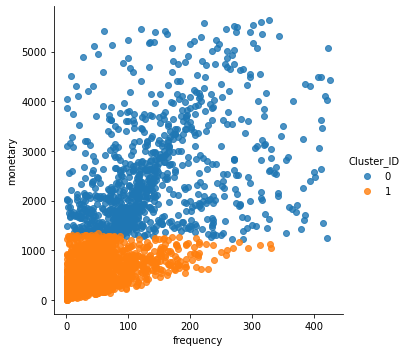

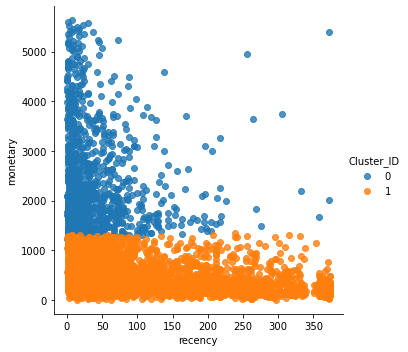

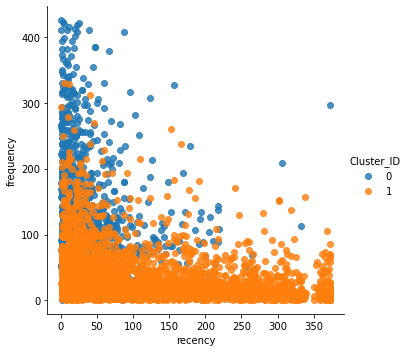

In [100]:
# Create a plot for frequency vs monetary 

facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs monetary

facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs frequency

facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

## The difference we observe between k fold and above plots is that there are only 2 clusters formed in the later where as in K folds we can have 'k' number of clusters.

## Evaluating clustering

In [101]:
# Import libraries

from sklearn import cluster
from sklearn import metrics

In [102]:
# Calculate Silhouette score for different cluster values

krange = list(range(2,5))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X1)

  silhouette_avg = metrics.silhouette_score(X1, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

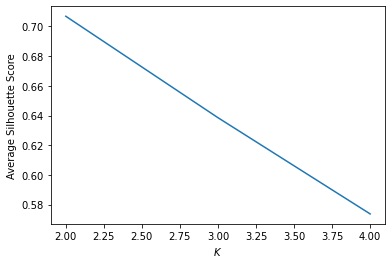

In [103]:
# PLot the score

plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()